## <span style="color: darkblue;">Import libraries and set paths </span>

In [2]:
import os
import sys
import pickle
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# add your data folder into the 'code' folder, make sure it is in the .gitignore file

CODE_DIR = os.getcwd()
DATA_DIR = os.path.join(CODE_DIR, 'data')

print('your data directory:')
DATA_DIR


your data directory:


'c:\\Users\\fulci\\git\\ada_23\\ada-2023-project-adarescueteam\\code\\data'

In [4]:
# set path for BeerAdvocate data
DATA_BeerAdvocate = os.path.join(DATA_DIR, "BeerAdvocate.tar")

# set path for RateBeer data
DATA_RateBeer = os.path.join(DATA_DIR, "RateBeer.tar")

# set path for MatchedBeer data
DATA_MatchedBeers = os.path.join(DATA_DIR, "matched_beer_data.tar")

## <span style="color: darkblue;">Define functions to load files</span>

### Convert the time for the users dataset

In [5]:
# convert the joined
def convert_timestamp(timestamp):
    try:
        timestamp = float(timestamp)
        return datetime.fromtimestamp(timestamp)
    except (ValueError, TypeError):
        return None

<span style="color: red;">can skip 'Read ratings' and 'Read reviews' if you downloaded the .csv data</span> ([download here preprocessed .txt to .csv data](https://drive.google.com/drive/folders/1ZhaUtzQaGtIEi6PmHZ7uXhoo7sC1byAT?usp=sharing))

### Read ratings

In [4]:
# read in the ratings
def read_ratings_txt(folder, file_name):
    data = []
    counter = 0

    with open(os.path.join(folder, file_name), 'rb') as file:
        rating_data = {}
        for line in file:
            line = line.strip()
            if line.startswith(b'beer_name:'):
                # check if dictionary is not empty
                if rating_data:
                    data.append(rating_data)
                rating_data = {'beer_name': line.split(b'beer_name:')[1].decode('utf-8')}
            elif line.startswith(b'beer_id:'):
                rating_data['beer_id'] = line.split(b'beer_id:')[1].decode('utf-8')
            elif line.startswith(b'brewery_name:'):
                rating_data['brewery_name'] = line.split(b'brewery_name:')[1].decode('utf-8')
            elif line.startswith(b'brewery_id:'):
                rating_data['brewery_id'] = line.split(b'brewery_id:')[1].decode('utf-8')
            elif line.startswith(b'style:'):
                rating_data['style'] = line.split(b'style:')[1].decode('utf-8')
            elif line.startswith(b'abv:'):
                rating_data['abv'] = line.split(b'abv:')[1].decode('utf-8')
            elif line.startswith(b'date:'):
                timestamp = float(line.split(b'date:')[1].decode('utf-8'))
                rating_data['date'] = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
            elif line.startswith(b'user_name:'):
                rating_data['user_name'] = line.split(b'user_name:')[1].decode('utf-8')
            elif line.startswith(b'user_id:'):
                rating_data['user_id'] = line.split(b'user_id:')[1].decode('utf-8')
            elif line.startswith(b'appearance:'):
                rating_data['appearance'] = line.split(b'appearance:')[1].decode('utf-8')
            elif line.startswith(b'aroma:'):
                rating_data['aroma'] = line.split(b'aroma:')[1].decode('utf-8')
            elif line.startswith(b'palate:'):
                rating_data['palate'] = line.split(b'palate:')[1].decode('utf-8')
            elif line.startswith(b'taste:'):
                rating_data['taste'] = line.split(b'taste:')[1].decode('utf-8')
            elif line.startswith(b'overall:'):
                rating_data['overall'] = line.split(b'overall:')[1].decode('utf-8')
            elif line.startswith(b'rating:'):
                rating_data['rating'] = line.split(b'rating:')[1].decode('utf-8')
            elif line.startswith(b'text:'):
                rating_data['text'] = line.split(b'text:')[1].decode('utf-8')
            elif line.startswith(b'review:'):
                rating_data['review'] = line.split(b'review:')[1].decode('utf-8')

            #counter += 1

            #if counter == 100000:  # limit amount of lines to read in
            #    break

    if rating_data:
        data.append(rating_data)

    ratings = pd.DataFrame(data)
    return ratings

### Read reviews

In [5]:
# read in the reviews
def read_reviews_txt(folder, file_name):
    data = []
    counter = 0

    with open(os.path.join(folder, file_name), 'rb') as file:
        review_data = {}
        for line in file:
            line = line.strip()
            if line.startswith(b'beer_name:'):
                # check if dictionary is not empty
                if review_data:
                    data.append(review_data)
                review_data = {'beer_name': line.split(b'beer_name:')[1].decode('utf-8')}
            elif line.startswith(b'beer_id:'):
                review_data['beer_id'] = line.split(b'beer_id:')[1].decode('utf-8')
            elif line.startswith(b'brewery_name:'):
                review_data['brewery_name'] = line.split(b'brewery_name:')[1].decode('utf-8')
            elif line.startswith(b'brewery_id:'):
                review_data['brewery_id'] = line.split(b'brewery_id:')[1].decode('utf-8')
            elif line.startswith(b'style:'):
                review_data['style'] = line.split(b'style:')[1].decode('utf-8')
            elif line.startswith(b'abv:'):
                review_data['abv'] = line.split(b'abv:')[1].decode('utf-8')
            elif line.startswith(b'date:'):
                timestamp = float(line.split(b'date:')[1].decode('utf-8'))
                review_data['date'] = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
            elif line.startswith(b'user_name:'):
                review_data['user_name'] = line.split(b'user_name:')[1].decode('utf-8')
            elif line.startswith(b'user_id:'):
                review_data['user_id'] = line.split(b'user_id:')[1].decode('utf-8')
            elif line.startswith(b'appearance:'):
                review_data['appearance'] = line.split(b'appearance:')[1].decode('utf-8')
            elif line.startswith(b'aroma:'):
                review_data['aroma'] = line.split(b'aroma:')[1].decode('utf-8')
            elif line.startswith(b'palate:'):
                review_data['palate'] = line.split(b'palate:')[1].decode('utf-8')
            elif line.startswith(b'taste:'):
                review_data['taste'] = line.split(b'taste:')[1].decode('utf-8')
            elif line.startswith(b'overall:'):
                review_data['overall'] = line.split(b'overall:')[1].decode('utf-8')
            elif line.startswith(b'rating:'):
                review_data['rating'] = line.split(b'rating:')[1].decode('utf-8')
            elif line.startswith(b'text:'):
                review_data['text'] = line.split(b'text:')[1].decode('utf-8')

            #counter += 1

            #if counter == 10000:  # limit amount of lines to read in
            #    break

    if review_data:
        data.append(review_data)

    reviews = pd.DataFrame(data)
    return reviews

# <span style="color: blue;">LOAD FILES</span>

## <span style="color: blue;">BeerAdvocate (BA) Dataset</span>

### beers.csv

In [26]:
# read in the beers.csv file as a DataFrame
BA_beers = pd.read_csv(os.path.join(DATA_BeerAdvocate, "beers.csv"))
BA_beers.head(), BA_beers.shape


(   beer_id           beer_name  brewery_id            brewery_name  \
 0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
 1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
 2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
 3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
 4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   
 
              style  nbr_ratings  nbr_reviews  avg  ba_score  bros_score  abv  \
 0  Euro Pale Lager            0            0  NaN       NaN         NaN  4.7   
 1  Euro Pale Lager            0            0  NaN       NaN         NaN  3.8   
 2  Euro Pale Lager            0            0  NaN       NaN         NaN  4.8   
 3  Euro Pale Lager            0            0  NaN       NaN         NaN  4.0   
 4  Euro Pale Lager            0            0  NaN       NaN         NaN  4.5   
 
    avg_computed  zscore  nbr_matched_valid_ratings  avg_matched_valid_ratings  
 0 

### breweries.csv

In [27]:
BA_breweries = pd.read_csv(os.path.join(DATA_BeerAdvocate, "breweries.csv"))
BA_breweries.head(), BA_breweries.shape

(      id    location                    name  nbr_beers
 0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
 1  39913  Kyrgyzstan             Arpa (АРПА)          1
 2  39914  Kyrgyzstan               Bear Beer          4
 3  39915  Kyrgyzstan             Blonder Pub          4
 4  39916  Kyrgyzstan            Kellers Bier          2,
 (16758, 4))

### users.csv

In [28]:
BA_users = pd.read_csv(os.path.join(DATA_BeerAdvocate, "users.csv"), 
                       converters={"joined": convert_timestamp}
                       )
BA_users.head(), BA_users.shape 

(   nbr_ratings  nbr_reviews                user_id        user_name  \
 0         7820          465         nmann08.184925          nmann08   
 1         2521         2504     stjamesgate.163714      StJamesGate   
 2         1797         1143          mdagnew.19527          mdagnew   
 3           31           31  helloloser12345.10867  helloloser12345   
 4          604          604        cypressbob.3708       cypressbob   
 
                joined                   location  
 0 2008-01-07 12:00:00  United States, Washington  
 1 2007-10-08 12:00:00    United States, New York  
 2 2005-05-18 12:00:00           Northern Ireland  
 3 2004-11-25 12:00:00           Northern Ireland  
 4 2003-11-20 12:00:00           Northern Ireland  ,
 (153704, 6))

### ratings.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
# read in the .txt
BA_ratings = read_ratings_txt(DATA_BeerAdvocate, "ratings.txt")
BA_ratings.head(), BA_ratings.shape

In [12]:
# create a csv from BA_ratings
BA_ratings.to_csv(os.path.join(DATA_BeerAdvocate, "BA_ratings.csv"), index=False)

<span style="color: red;">*</span>

In [5]:
# read in new BA_ratings.csv
BA_ratings = pd.read_csv(os.path.join(DATA_BeerAdvocate, "BA_ratings.csv"), header=0)
BA_ratings.head(), BA_ratings.shape

C:\Users\fulci\AppData\Local\Temp\ipykernel_23016\2739307063.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  BA_ratings = pd.read_csv(os.path.join(DATA_BeerAdvocate, "BA_ratings.csv"), header=0)


(        beer_name  beer_id                                brewery_name  \
 0           Régab   142544   Societe des Brasseries du Gabon (SOBRAGA)   
 1   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 2   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 3   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 4   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 
    brewery_id              style   abv                 date         user_name  \
 0       37262    Euro Pale Lager   4.5  2015-08-20 10:00:00           nmann08   
 1       10093   English Pale Ale   4.5  2009-02-20 11:00:00       StJamesGate   
 2       10093   English Pale Ale   4.5  2006-03-13 11:00:00           mdagnew   
 3       10093   English Pale Ale   4.5  2004-12-01 11:00:00   helloloser12345   
 4       10093   English Pale Ale   4.5  2004-08-30 10:00:00        cypressbob   
 
                   user_id appearance  aroma palate  t

### reviews.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
# read the .txt file
BA_reviews = read_reviews_txt(DATA_BeerAdvocate, "reviews.txt")
BA_reviews.head(), BA_reviews.shape

In [21]:
# write the csv file
BA_reviews.to_csv(os.path.join(DATA_BeerAdvocate, "BA_reviews.csv"), index=False)

<span style="color: red;">*</span>

In [9]:
# read back in the csv file
BA_reviews = pd.read_csv(os.path.join(DATA_BeerAdvocate, "BA_reviews.csv"), header=0)
BA_reviews.head(), BA_reviews.shape

(        beer_name  beer_id                                brewery_name  \
 0           Régab   142544   Societe des Brasseries du Gabon (SOBRAGA)   
 1   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 2   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 3   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 4   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 
    brewery_id              style   abv                 date         user_name  \
 0       37262    Euro Pale Lager   4.5  2015-08-20 10:00:00           nmann08   
 1       10093   English Pale Ale   4.5  2009-02-20 11:00:00       StJamesGate   
 2       10093   English Pale Ale   4.5  2006-03-13 11:00:00           mdagnew   
 3       10093   English Pale Ale   4.5  2004-12-01 11:00:00   helloloser12345   
 4       10093   English Pale Ale   4.5  2004-08-30 10:00:00        cypressbob   
 
                   user_id appearance  aroma palate  t

## <span style="color: blue;">RateBeer (RB) Dataset</span>

### beers.csv

In [34]:
# read in the beers.csv file as a DataFrame
RB_beers = pd.read_csv(os.path.join(DATA_RateBeer, "beers.csv"))
RB_beers.head(), RB_beers.shape

(   beer_id               beer_name  brewery_id      brewery_name  \
 0   410549       33 Export (Gabon)        3198           Sobraga   
 1   105273     Castel Beer (Gabon)        3198           Sobraga   
 2    19445                   Régab        3198           Sobraga   
 3   155699  Ards Bally Black Stout       13538  Ards Brewing Co.   
 4   239097        Ards Belfast 366       13538  Ards Brewing Co.   
 
                   style  nbr_ratings  overall_score  style_score   avg  abv  \
 0            Pale Lager            1            NaN          NaN  2.72  5.0   
 1            Pale Lager           10            5.0         58.0  2.18  5.2   
 2            Pale Lager           27            1.0         22.0  1.83  4.5   
 3                 Stout            6            NaN          NaN  3.18  4.6   
 4  Golden Ale/Blond Ale            1            NaN          NaN  2.79  4.2   
 
    avg_computed    zscore  nbr_matched_valid_ratings  \
 0      2.000000       NaN                   

### breweries.csv

In [35]:
RB_breweries = pd.read_csv(os.path.join(DATA_RateBeer, "breweries.csv"))
RB_breweries.head(), RB_breweries.shape

(      id          location                       name  nbr_beers
 0   3198             Gabon                    Sobraga          3
 1  13538  Northern Ireland           Ards Brewing Co.         13
 2  22304  Northern Ireland  Barrahooley Craft Brewery          4
 3  22818  Northern Ireland                   Boundary         66
 4  24297  Northern Ireland            Brewbot Belfast          3,
 (24189, 4))

### users.csv

In [37]:
RB_users = pd.read_csv(os.path.join(DATA_RateBeer, "users.csv"),
                       converters={"joined": convert_timestamp}
                       )
RB_users.shape, BA_users.head()

((70174, 5),
    nbr_ratings  nbr_reviews                user_id        user_name  \
 0         7820          465         nmann08.184925          nmann08   
 1         2521         2504     stjamesgate.163714      StJamesGate   
 2         1797         1143          mdagnew.19527          mdagnew   
 3           31           31  helloloser12345.10867  helloloser12345   
 4          604          604        cypressbob.3708       cypressbob   
 
                joined                   location  
 0 2008-01-07 12:00:00  United States, Washington  
 1 2007-10-08 12:00:00    United States, New York  
 2 2005-05-18 12:00:00           Northern Ireland  
 3 2004-11-25 12:00:00           Northern Ireland  
 4 2003-11-20 12:00:00           Northern Ireland  )

### ratings.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
# read in the .txt
RB_ratings = read_reviews_txt(DATA_RateBeer, "ratings.txt") # has no 'review' column
RB_ratings.head(), RB_ratings.shape

In [9]:
# create a csv from RB_ratings
RB_ratings.to_csv(os.path.join(DATA_RateBeer, "RB_ratings.csv"), index=False)

<span style="color: red;">*</span>

In [35]:
# read back in the ratings csv file
RB_ratings = pd.read_csv(os.path.join(DATA_RateBeer, "RB_ratings.csv"), header=0)
RB_ratings.head(5), RB_ratings.shape

C:\Users\fulci\AppData\Local\Temp\ipykernel_23016\3449270348.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  RB_ratings = pd.read_csv(os.path.join(DATA_RateBeer, "RB_ratings.csv"), header=0)


(              beer_name  beer_id brewery_name  brewery_id        style   abv  \
 0     33 Export (Gabon)   410549      Sobraga        3198   Pale Lager   5.0   
 1   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 2   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 3   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 4   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 
                   date      user_name  user_id  appearance  aroma  palate  \
 0  2016-04-26 10:00:00        Manslow   175852           2      4       2   
 1  2017-02-17 11:00:00   MAGICuenca91   442761           2      3       2   
 2  2016-06-24 10:00:00         Sibarh   288889           3      3       2   
 3  2016-01-01 11:00:00        fombe89   250510           4      3       1   
 4  2015-10-23 10:00:00     kevnic2008   122778           2      4       2   
 
    taste  overall  rating                

### reviews.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
# read in the .txt file
RB_reviews = read_reviews_txt(DATA_RateBeer, "reviews.txt")
RB_reviews.head(), RB_reviews.shape

In [12]:
# create a csv from RB_reviews
RB_reviews.to_csv(os.path.join(DATA_RateBeer, "RB_reviews.csv"), index=False)

<span style="color: red;">*</span>

In [36]:
# read back in the reviews csv file
RB_reviews = pd.read_csv(os.path.join(DATA_RateBeer, "RB_reviews.csv"), header=0)
RB_reviews.head(5), RB_reviews.shape

C:\Users\fulci\AppData\Local\Temp\ipykernel_23016\3713087291.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  RB_reviews = pd.read_csv(os.path.join(DATA_RateBeer, "RB_reviews.csv"), header=0)


(              beer_name  beer_id brewery_name  brewery_id        style   abv  \
 0     33 Export (Gabon)   410549      Sobraga        3198   Pale Lager   5.0   
 1   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 2   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 3   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 4   Castel Beer (Gabon)   105273      Sobraga        3198   Pale Lager   5.2   
 
                   date      user_name  user_id  appearance  aroma  palate  \
 0  2016-04-26 10:00:00        Manslow   175852           2      4       2   
 1  2017-02-17 11:00:00   MAGICuenca91   442761           2      3       2   
 2  2016-06-24 10:00:00         Sibarh   288889           3      3       2   
 3  2016-01-01 11:00:00        fombe89   250510           4      3       1   
 4  2015-10-23 10:00:00     kevnic2008   122778           2      4       2   
 
    taste  overall  rating                

## <span style="color: blue;">Matched beer (MB) dataset</span>

### beers.csv

In [40]:
# read in the beers.csv file as a DataFrame
MB_beers = pd.read_csv(os.path.join(DATA_MatchedBeers, "beers.csv"))
MB_beers.head(), MB_beers.shape

C:\Users\fulci\AppData\Local\Temp\ipykernel_20928\2716705438.py:2: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  MB_beers = pd.read_csv(os.path.join(DATA_MatchedBeers, "beers.csv"))


(    ba  ba.1               ba.2                       ba.3      ba.4     ba.5  \
 0  abv   avg       avg_computed  avg_matched_valid_ratings  ba_score  beer_id   
 1  4.8  3.45  3.439866666666666          3.504067796610169      80.0    19827   
 2  6.0  3.86            3.88875          3.768333333333333       NaN    20841   
 3  4.2  3.56         3.55609375          3.580416666666667      82.0    20842   
 4  4.8  3.96               3.96                       3.96       NaN    22659   
 
                  ba.6                    ba.7        ba.8  \
 0           beer_name  beer_wout_brewery_name  brewery_id   
 1            Legbiter                Legbiter       10093   
 2   St. Patrick's Ale         Patricks Ale St       10093   
 3  St. Patrick's Best        Patricks Best St       10093   
 4  St. Patrick's Gold        Patricks Gold St       10093   
 
                                    ba.9  ...        rb.7              rb.8  \
 0                          brewery_name  ...  brewer

### breweries.csv

In [41]:
MB_breweries = pd.read_csv(os.path.join(DATA_MatchedBeers, "breweries.csv"))
MB_breweries.head(), MB_breweries.shape

(      ba              ba.1                                  ba.2       ba.3  \
 0     id          location                                  name  nbr_beers   
 1  10093  Northern Ireland  Strangford Lough Brewing Company Ltd          5   
 2  32848  Northern Ireland                   The Sheelin Brewery          4   
 3  40360  Northern Ireland           Walled City Brewing Company          6   
 4  40309  Northern Ireland                  Ards Brewing Company          7   
 
       rb              rb.1              rb.2       rb.3               scores  \
 0     id          location              name  nbr_beers                 diff   
 1   4959  Northern Ireland  Strangford Lough          5  0.43127548708778424   
 2  17616  Northern Ireland           Sheelin          2     0.52638836243535   
 3  24866  Northern Ireland       Walled City          3   0.5278523214614645   
 4  13538  Northern Ireland  Ards Brewing Co.         13   0.5543953017091594   
 
              scores.1  
 0   

### users.csv

In [45]:
MB_users.columns # first run the cell down below

Index(['ba', 'ba.1', 'ba.2', 'ba.3', 'ba.4', 'ba.5', 'ba.6', 'rb', 'rb.1',
       'rb.2', 'rb.3', 'rb.4', 'rb.5'],
      dtype='object')

In [44]:
MB_users = pd.read_csv(os.path.join(DATA_MatchedBeers, "users.csv"), 
                       converters={"ba": convert_timestamp, "rb": convert_timestamp}
                       )
MB_users.head(), MB_users.shape

(                   ba                       ba.1         ba.2         ba.3  \
 0                 NaT                   location  nbr_ratings  nbr_reviews   
 1 2008-09-08 12:00:00                    Germany            6            6   
 2 2012-09-23 12:00:00    United States, Virginia            1            1   
 3 2008-04-04 12:00:00  United States, Washington            3            3   
 4 2011-12-01 12:00:00                    Estonia           11            0   
 
                  ba.4         ba.5             ba.6                  rb  \
 0             user_id    user_name  user_name_lower                 NaT   
 1     erzengel.248045     Erzengel         erzengel 2008-10-18 12:00:00   
 2     gendv138.695700     GenDV138         gendv138 2013-11-29 12:00:00   
 3   nimbleprop.208928   nimbleprop       nimbleprop 2006-06-20 12:00:00   
 4  visionthing.639993  visionthing      visionthing 2009-05-22 12:00:00   
 
                         rb.1         rb.2     rb.3         rb.4  

### users_approx.csv

In [46]:
MB_users_approx = pd.read_csv(os.path.join(DATA_MatchedBeers, "users.csv"), 
                       converters={"ba": convert_timestamp, "rb": convert_timestamp}
                       )
MB_users_approx.head(), MB_users_approx.shape 

(                   ba                       ba.1         ba.2         ba.3  \
 0                 NaT                   location  nbr_ratings  nbr_reviews   
 1 2008-09-08 12:00:00                    Germany            6            6   
 2 2012-09-23 12:00:00    United States, Virginia            1            1   
 3 2008-04-04 12:00:00  United States, Washington            3            3   
 4 2011-12-01 12:00:00                    Estonia           11            0   
 
                  ba.4         ba.5             ba.6                  rb  \
 0             user_id    user_name  user_name_lower                 NaT   
 1     erzengel.248045     Erzengel         erzengel 2008-10-18 12:00:00   
 2     gendv138.695700     GenDV138         gendv138 2013-11-29 12:00:00   
 3   nimbleprop.208928   nimbleprop       nimbleprop 2006-06-20 12:00:00   
 4  visionthing.639993  visionthing      visionthing 2009-05-22 12:00:00   
 
                         rb.1         rb.2     rb.3         rb.4  

### ratings_ba.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
MB_ratings_ba = read_ratings_txt(DATA_MatchedBeers, "ratings_ba.txt") # contains TRUE and FALSE values in the 'review' column  # ratings_ba.review.head(40), 
MB_ratings_ba.head(), MB_ratings_ba.shape

In [17]:
# create a csv from RB_ratings
MB_ratings_ba.to_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_ba.csv"), index=False)

<span style="color: red;">*</span>

In [6]:
# read back in the ratings csv file
MB_ratings_ba = pd.read_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_ba.csv"), header=0)
MB_ratings_ba.head(), MB_ratings_ba.shape

(   beer_name  beer_id                           brewery_name  brewery_id  \
 0   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 1   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 2   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 3   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 4   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 
                style  abv                 date        user_name  \
 0   English Pale Ale  4.8  2014-12-01 11:00:00        Hellpop65   
 1   English Pale Ale  4.8  2014-05-29 10:00:00         Latarnik   
 2   English Pale Ale  4.8  2014-02-26 11:00:00   RochefortChris   
 3   English Pale Ale  4.8  2014-02-10 11:00:00       OKCNittany   
 4   English Pale Ale  4.8  2014-01-25 11:00:00           jaydoc   
 
                   user_id appearance aroma palate taste overall  rating  text  \
 0         hellpop65.48993        nan   nan 

### ratings_with_text_ba.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
MB_ratings_with_text_ba = read_ratings_txt(DATA_MatchedBeers, "ratings_with_text_ba.txt") # contains only TRUE values in the 'review' column # ratings_ba_with_text_ba.review.head(40), 
MB_ratings_with_text_ba.head(), MB_ratings_with_text_ba.shape

In [22]:
# create a csv from RB_reviews
MB_ratings_with_text_ba.to_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_with_text_ba.csv"), index=False)

<span style="color: red;">*</span>

In [7]:
# read back in the ratings csv file
MB_ratings_with_text_ba = pd.read_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_with_text_ba.csv"), header=0)
MB_ratings_with_text_ba.head(), MB_ratings_with_text_ba.shape

(   beer_name  beer_id                           brewery_name  brewery_id  \
 0   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 1   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 2   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 3   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 4   Legbiter    19827   Strangford Lough Brewing Company Ltd       10093   
 
                style  abv                 date      user_name  \
 0   English Pale Ale  4.8  2013-02-13 11:00:00   brewdude1982   
 1   English Pale Ale  4.8  2013-01-09 11:00:00     AgentMunky   
 2   English Pale Ale  4.8  2012-11-17 11:00:00      ferrari29   
 3   English Pale Ale  4.8  2012-07-14 10:00:00     OtherShoe2   
 4   English Pale Ale  4.8  2012-04-28 10:00:00       brentk56   
 
                 user_id appearance  aroma palate  taste overall  rating  \
 0   brewdude1982.691169       4.25    4.5   3.25   3.75    3.

### ratings_rb.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
MB_ratings_rb = read_ratings_txt(DATA_MatchedBeers, "ratings_rb.txt") # contains TRUE and FALSE values in the 'review' column  # ratings_ba.review.head(40), 
MB_ratings_rb.head(), MB_ratings_rb.shape

In [25]:
# create a csv from RB_ratings
MB_ratings_rb.to_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_rb.csv"), index=False)

<span style="color: red;">*</span>

In [8]:
# read back in the ratings csv file
MB_ratings_rb = pd.read_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_rb.csv"), header=0)
MB_ratings_rb.head(), MB_ratings_rb.shape

(                 beer_name  beer_id       brewery_name  brewery_id   style  \
 0   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 1   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 2   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 3   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 4   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 
    abv                 date   user_name  user_id  appearance  aroma  palate  \
 0  4.6  2015-04-16 10:00:00     ciaranc   151109           3      7       2   
 1  4.6  2015-03-31 10:00:00     Rowlymo   198957           4      7       4   
 2  4.6  2015-01-19 11:00:00     Don2711   285162           4      8       5   
 3  4.6  2013-10-01 10:00:00   genegenie   224156           5      8       3   
 4  4.6  2013-06-18 10:00:00    kiwianer    88501           4      7       4   
 
    taste  overall  rating                

### ratings_with_text_rb.txt

run only the code below (<span style="color: red;">*</span>) if you have downloaded the .csv file:

In [ ]:
MB_ratings_with_text_rb = read_ratings_txt(DATA_MatchedBeers, "ratings_with_text_rb.txt") # contains only TRUE values in the 'review' column # ratings_ba_with_text_ba.review.head(40), 
MB_ratings_with_text_rb.head(), MB_ratings_with_text_rb.shape

In [26]:
# create a csv from RB_reviews
MB_ratings_with_text_rb.to_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_with_text_rb.csv"), index=False)

<span style="color: red;">*</span>

In [9]:
# read back in the ratings csv file
MB_ratings_with_text_rb = pd.read_csv(os.path.join(DATA_MatchedBeers, "MB_ratings_with_text_rb.csv"), header=0)
MB_ratings_with_text_rb.head(), MB_ratings_with_text_rb.shape

(                 beer_name  beer_id       brewery_name  brewery_id   style  \
 0   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 1   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 2   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 3   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 4   Ards Bally Black Stout   155699   Ards Brewing Co.       13538   Stout   
 
    abv                 date   user_name  user_id  appearance  aroma  palate  \
 0  4.6  2015-04-16 10:00:00     ciaranc   151109           3      7       2   
 1  4.6  2015-03-31 10:00:00     Rowlymo   198957           4      7       4   
 2  4.6  2015-01-19 11:00:00     Don2711   285162           4      8       5   
 3  4.6  2013-10-01 10:00:00   genegenie   224156           5      8       3   
 4  4.6  2013-06-18 10:00:00    kiwianer    88501           4      7       4   
 
    taste  overall  rating                

## Pickle the dataframes

In [ ]:
# first create a file .pkl in your code folder before running this cell
# attempt to create a pickle.. MemoryError .. with 32gb of ram
with open('BA_ratings.pkl', 'wb') as file:
    pickle.dump(BA_ratings, file)
#OR
# example for multiple objects
with open('data_beers.pkl', 'wb') as file:
    pickle.dump([BA_beers, BA_breweries, BA_users, BA_ratings, BA_reviews], file)
    pickle.dump([RB_beers, RB_breweries, RB_users, RB_ratings, RB_reviews], file)
    pickle.dump([MB_beers, MB_breweries, MB_users, MB_users_approx, MB_ratings_ba, MB_ratings_with_text_ba, MB_ratings_rb, MB_ratings_with_text_rb], file)

However that should not be necessary..

## How similar are the datasets

### BA_ratings and BA_reviews

In [57]:
BA_ratings.shape, BA_reviews.shape

((8393032, 17), (2589586, 16))

In [6]:
#compare how similar BA_ratings and BA_reviews are
BA_ratings.columns, BA_reviews.columns

(Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
        'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
        'taste', 'overall', 'rating', 'text', 'review'],
       dtype='object'),
 Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
        'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
        'taste', 'overall', 'rating', 'text'],
       dtype='object'))

In [7]:
# drop the review column in ratings
BA_ratings_temp = BA_ratings.drop(columns='review').copy()
BA_ratings_temp.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text'],
      dtype='object')

In [ ]:
# comparison and create indexes
BA_compare = BA_ratings_temp.isin(BA_reviews)

In [30]:
BA_compare.head(6), BA_compare.shape

(   beer_name  beer_id  brewery_name  brewery_id  style   abv   date  \
 0       True     True          True        True   True  True   True   
 1       True     True          True        True   True  True   True   
 2       True     True          True        True   True  True   True   
 3       True     True          True        True   True  True   True   
 4       True     True          True        True   True  True   True   
 5       True     True          True        True   True  True  False   
 
    user_name  user_id  appearance  aroma  palate  taste  overall  rating  \
 0       True     True        True   True    True   True     True    True   
 1       True     True        True   True    True   True     True    True   
 2       True     True        True   True    True   True     True    True   
 3       True     True        True   True    True   True     True    True   
 4       True     True        True   True    True   True     True    True   
 5      False    False       Fal

In [46]:
# check how many rows have 'True' in all columns
BA_compare.eq(True).all(axis=1).sum() # .eq(True) is the same as == True

5

i.e. only the 5 first entries are the same, this works also the other way around:

In [47]:
BA_compare_temp = BA_reviews.copy().isin(BA_ratings)

In [48]:
BA_compare_temp.eq(True).all(axis=1).sum()

5

So this means both datasets have to be used, as reviews most likely are not contained in the ratings.

### RB_ratings and RB_reviews

In [56]:
RB_ratings.shape, RB_reviews.shape

((7122074, 16), (7122074, 16))

In [37]:
#compare how similar BA_ratings and BA_reviews are
RB_ratings.columns, RB_reviews.columns

(Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
        'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
        'taste', 'overall', 'rating', 'text'],
       dtype='object'),
 Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
        'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
        'taste', 'overall', 'rating', 'text'],
       dtype='object'))

There is no review column in this dataset

In [ ]:
# comparison and create indexes
RB_compare = RB_ratings.isin(RB_reviews)

In [42]:
RB_compare.head(), RB_compare.shape

(   beer_name  beer_id  brewery_name  brewery_id  style   abv  date  user_name  \
 0       True     True          True        True   True  True  True       True   
 1       True     True          True        True   True  True  True       True   
 2       True     True          True        True   True  True  True       True   
 3       True     True          True        True   True  True  True       True   
 4       True     True          True        True   True  True  True       True   
 
    user_id  appearance  aroma  palate  taste  overall  rating  text  
 0     True        True   True    True   True     True    True  True  
 1     True        True   True    True   True     True    True  True  
 2     True        True   True    True   True     True    True  True  
 3     True        True   True    True   True     True    True  True  
 4     True        True   True    True   True     True    True  True  ,
 (7122074, 16))

In [49]:
# check how many rows have 'True' in all columns
RB_compare.eq(True).all(axis=1).sum() # .eq(True) is the same as == True

7121626

In [55]:
RB_reviews.shape

(7122074, 16)

i.e. 7121626/7122074 (about 450 are not) entries of RB_ratings coincide with RB_reviews

In [52]:
RB_compare_temp = RB_reviews.isin(RB_ratings)

In [59]:
# check how many rows have 'True' in all columns
RB_compare_temp.eq(True).all(axis=1).sum() # .eq(True) is the same as == True

7121626

In this approach it seems that we have an issue to find all the rows within the respective dataframes. We can use another approach instead to compare the dataframes directly:

In [60]:
RB_ratings.equals(RB_reviews)

True

So the assumption that both dataframes are equal is true.

Just to make sure, that the assumption that the BA_dataframes are really not equal, we go with the same approach:

In [68]:
BA_ratings.equals(BA_reviews), BA_reviews.equals(BA_ratings)

(False, False)

### MatchedBeer with itself and in RateBeer or BeerAd

#### MB_ratings_ba

In [10]:
MB_ratings_ba.shape, MB_ratings_with_text_ba.shape

((955968, 17), (289025, 17))

In [11]:
MB_ratings_ba.columns, MB_ratings_with_text_ba.columns

(Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
        'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
        'taste', 'overall', 'rating', 'text', 'review'],
       dtype='object'),
 Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
        'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
        'taste', 'overall', 'rating', 'text', 'review'],
       dtype='object'))

In [14]:
MB_ratings_ba.head(40)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-12-01 11:00:00,Hellpop65,hellpop65.48993,nan,nan,nan,nan,nan,3.25,nan,False
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-05-29 10:00:00,Latarnik,latarnik.52897,nan,nan,nan,nan,nan,3.50,nan,False
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-02-26 11:00:00,RochefortChris,rochefortchris.697017,nan,nan,nan,nan,nan,3.50,nan,False
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-02-10 11:00:00,OKCNittany,okcnittany.144868,nan,nan,nan,nan,nan,3.75,nan,False
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-01-25 11:00:00,jaydoc,jaydoc.265507,nan,nan,nan,nan,nan,3.25,nan,False
5,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-10-03 10:00:00,ejimhof,ejimhof.5743,nan,nan,nan,nan,nan,3.00,nan,False
6,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-04-25 10:00:00,GraduatedCashew,graduatedcashew.730089,nan,nan,nan,nan,nan,3.00,nan,False
7,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-02-13 11:00:00,brewdude1982,brewdude1982.691169,4.25,4.5,3.25,3.75,3.75,3.91,This was a 12 oz bottle poured into a snifter...,True
8,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-01-09 11:00:00,AgentMunky,agentmunky.409755,4.0,3.75,3.5,3.5,3.75,3.64,Poured from a 12 ounce bottle into a pilsner ...,True
9,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2012-12-14 11:00:00,swungomonkey,swungomonkey.698859,nan,nan,nan,nan,nan,3.00,nan,False


In [13]:
MB_ratings_with_text_ba.head(40)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-02-13 11:00:00,brewdude1982,brewdude1982.691169,4.25,4.5,3.25,3.75,3.75,3.91,This was a 12 oz bottle poured into a snifter...,True
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-01-09 11:00:00,AgentMunky,agentmunky.409755,4.0,3.75,3.5,3.5,3.75,3.64,Poured from a 12 ounce bottle into a pilsner ...,True
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2012-11-17 11:00:00,ferrari29,ferrari29.320392,3.0,3.5,2.5,2.5,2.5,2.77,Beer poured from bottle into a Nonic shaped p...,True
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2012-07-14 10:00:00,OtherShoe2,othershoe2.233642,4.0,3.5,4.0,3.5,4.0,3.68,Pours a rich brownish red with some chill haz...,True
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2012-04-28 10:00:00,brentk56,brentk56.6284,4.5,3.0,3.5,2.5,2.5,2.84,Appearance: These Strangford Lough beers pour...,True
5,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2012-04-28 10:00:00,emerge077,emerge077.17949,4.0,3.0,3.5,3.0,3.5,3.21,"Six pack from George's deli case, always some...",True
6,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2012-03-23 11:00:00,GarthDanielson,garthdanielson.522584,4.0,3.5,2.5,3.5,3.0,3.33,"Poured from a bottle into a tumbler pint, the...",True
7,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2011-12-10 11:00:00,chinchill,chinchill.199175,4.0,3.5,4.0,4.0,4.0,3.88,A- Pours a dark brownish red with a nice crea...,True
8,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2011-11-11 11:00:00,BrettMc,brettmc.615627,4.0,4.0,4.0,4.0,4.0,4.00,Poured into a Jail House Brewery tumbler. The...,True
9,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2011-09-14 10:00:00,Cyberkedi,cyberkedi.113659,4.0,3.0,3.0,3.5,3.5,3.36,"Pours a nice clear mahogany with a fluffy, if...",True


Evaluating from the review column, it looks like the rating with text is a subset of the whole rating dataset but with the condition that review == True. (the 7th col of _ratings coincides with the 0th column of ratings_text) Lets check if thus the ratings with text are included in the ratings dataset.

In [16]:
# this approach doesnt work on: 
MB_compare_ba = MB_ratings_with_text_ba.isin(MB_ratings_ba)
MB_compare_ba.head(40)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
5,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
6,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
7,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True
8,True,True,True,True,True,True,False,False,False,True,False,False,False,False,False,False,True
9,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False


actually the recognition does work... but just for aroma and review, and just for the 8th row...... let's try to look at the datatype.

In [238]:
MB_ratings_ba.dtypes
MB_ratings_with_text_ba.dtypes

beer_name        object
beer_id           int64
brewery_name     object
brewery_id        int64
style            object
abv             float64
date             object
user_name        object
user_id          object
appearance       object
aroma            object
palate           object
taste            object
overall          object
rating          float64
text             object
review           object
dtype: object

Thus we need to convert the values in the right datatype first:

In [249]:
MB_ratings_with_text_ba = MB_ratings_with_text_ba.convert_dtypes(infer_objects=True, convert_string=True,
      convert_integer=True, convert_boolean=True, convert_floating=True)
MB_ratings_with_text_ba.dtypes

beer_name       string[python]
beer_id                  Int64
brewery_name    string[python]
brewery_id               Int64
style           string[python]
abv                    Float64
date            string[python]
user_name       string[python]
user_id         string[python]
appearance      string[python]
aroma           string[python]
palate          string[python]
taste           string[python]
overall         string[python]
rating                 Float64
text            string[python]
review          string[python]
dtype: object

This does not seem to work properly, so we convert manually:

In [251]:
MB_ratings_with_text_ba['review'] = MB_ratings_with_text_ba['review'].astype(bool)
MB_ratings_ba['review'] = MB_ratings_ba['review'].astype(bool)

MB_ratings_ba['date'] = pd.to_datetime(MB_ratings_ba['date'], errors='coerce')
MB_ratings_with_text_ba['date'] = pd.to_datetime(MB_ratings_with_text_ba['date'], errors='coerce')

MB_ratings_ba[['user_name', 'user_id', 'text']] = MB_ratings_ba[['user_name', 'user_id', 'text']].astype('string')
MB_ratings_with_text_ba[['user_name', 'user_id', 'text']] = MB_ratings_with_text_ba[['user_name', 'user_id', 'text']].astype('string')

MB_ratings_ba[['appearance', 'aroma', 'palate', 'taste', 'overall']] = MB_ratings_ba[['appearance', 'aroma', 'palate', 'taste', 'overall']].apply(pd.to_numeric, errors='coerce')
MB_ratings_with_text_ba[['appearance', 'aroma', 'palate', 'taste', 'overall']] = MB_ratings_with_text_ba[['appearance', 'aroma', 'palate', 'taste', 'overall']].apply(pd.to_numeric, errors='coerce')

In [252]:
MB_ratings_ba.dtypes,
MB_ratings_with_text_ba.dtypes


beer_name       string[python]
beer_id                  Int64
brewery_name    string[python]
brewery_id               Int64
style           string[python]
abv                    Float64
date            datetime64[ns]
user_name       string[python]
user_id         string[python]
appearance             Float64
aroma                  Float64
palate                 Float64
taste                  Float64
overall                Float64
rating                 Float64
text            string[python]
review                    bool
dtype: object

In [18]:
MB_compare_ba = MB_ratings_with_text_ba.isin(MB_ratings_ba)
MB_compare_ba.head(80)#, MB_compare_ba.shape

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
76,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
77,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
78,False,False,True,True,False,False,False,False,False,True,False,True,True,False,False,False,True


In [22]:
MB_compare_ba.eq(True).all(axis=1).sum() 

0

That doesnt seem to work, but most likely all the rating_with text is included into rating .. just need to figure out how to compare them
-> question to TA?

#### MB_ratings_rb

In [ ]:
MB_ratings_with_text_rb

#### another question to adress, is if the MB rating data is contained in RB or BA, which would make sense given the name, but in that case we would not need to bother with the MB data as it is already contained in the other two datasets...

# Exploratory Data Analysis

## How many breweries produce just one beer 

In [ ]:
# BA data
print('breweries that produced only one beer:', len(BA_breweries.loc[BA_breweries['nbr_beers'] <= 1]))
percent = len(BA_breweries.loc[BA_breweries['nbr_beers'] <= 1]) / len(BA_breweries) * 100
print('that is,', round(percent, 2),'%')

breweries that produced only one beer: 3958
that is, 23.62 %


In [36]:
# RB data
print('breweries that produced only one beer:', len(RB_breweries.loc[RB_breweries['nbr_beers'] <= 1]))
percent = len(RB_breweries.loc[RB_breweries['nbr_beers'] <= 1]) / len(RB_breweries) * 100
print('that is,', round(percent, 2),'%')

breweries that produced only one beer: 2745
that is, 11.35 %


## How many languages?

### Install requirements and load SpaCY package

separate installation :

pip install spacy-langdetect

pip install spacy

spacy download en_core_web_sm

In [1]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

### Search in MB_ratings_with_text_ba

In [40]:
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999976138685517}


In [58]:
BA_text = MB_ratings_with_text_ba['text'][:1000]

In [74]:
# needs about 20s for 1000 rows
lang_result_BA = []
for row in range(len(BA_text)):
    doc = nlp(BA_text[row])
    lang_result_BA.append(doc._.language['language']) 

In [61]:
# test how much en is in lang_result_BA
lang_result_BA.count('en') / len(lang_result_BA) * 100

99.8

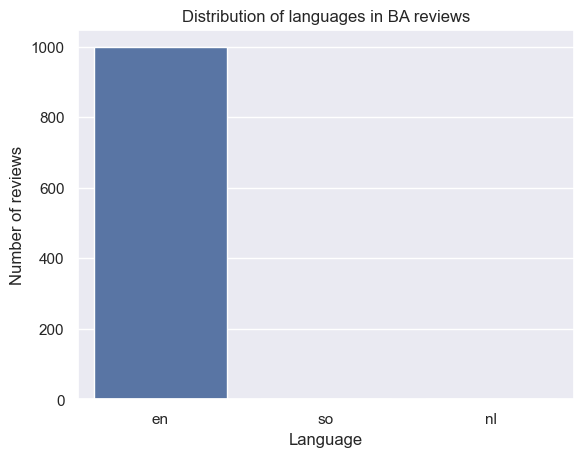

In [62]:
# display the distribution of languages
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=lang_result_BA)
ax.set_title('Distribution of languages in BA reviews')
ax.set_xlabel('Language')
ax.set_ylabel('Number of reviews')
plt.show()

In [73]:
# find other language indexes
lang_result_BA.index('so'), lang_result_BA.index('nl')

(561, 578)

In [69]:
# display other language reviews
print(BA_text[lang_result_BA.index('so')], '\n') #might be english, slowenian, or slovak..
print(BA_text[lang_result_BA.index('nl')], '\n') #likely a typo

 Cask 

 Good not amazing decent bottke 



## How many beertypes ..